### Reduce data dimensions by building an autoencoder 


In [41]:
!pip install -U tensorflow

  Using cached https://files.pythonhosted.org/packages/27/8c/7608ba709bd536bc2bccb0d1abbb70aafe9cf7e0170353b4b720ed54cb71/tensorflow-1.14.0-cp36-cp36m-macosx_10_11_x86_64.whl
  Found existing installation: wrapt 1.10.11
ERROR: Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
!pip install -U keras

Requirement already up-to-date: keras in /anaconda3/lib/python3.6/site-packages (2.2.4)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
import keras
import gzip
import numpy as np

from matplotlib import pyplot as plt

In [44]:
print(keras.__version__)

2.2.4


In [45]:
IMAGE_FEATURES = 28*28

### Load and Pre-process Data

* The NotMNIST dataset comprises 28x28 grayscale images of 70,000 letters from A - J in total 10 categories, and 6,000 images per category.

https://github.com/davidflanagan/notMNIST-to-MNIST

In [46]:
def extract_data(filename, num_images):
    
    with gzip.open(filename) as bytestream:
        
        bytestream.read(16)
        buf = bytestream.read(IMAGE_FEATURES * num_images)
        
        data = np.frombuffer(buf, dtype = np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_FEATURES)
        
        return data

In [47]:
train_data = extract_data('datasets/train-images-idx3-ubyte.gz', 60000)

test_data = extract_data('datasets/t10k-images-idx3-ubyte.gz', 10000)

In [48]:
train_data.shape, test_data.shape

((60000, 784), (10000, 784))

In [49]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [50]:
def display_image(image_pixels):
    plt.imshow(image_pixels.reshape(28, 28), cmap = 'gray')

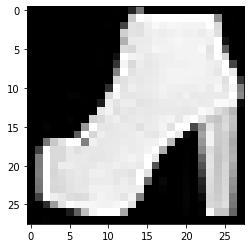

In [51]:
display_image(train_data[44])

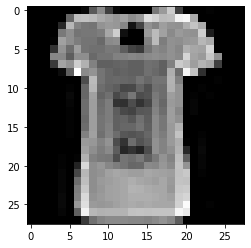

In [52]:
display_image(train_data[444])

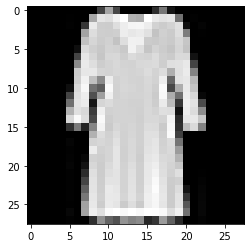

In [53]:
display_image(train_data[4444])

In [54]:
train_data.dtype, test_data.dtype

(dtype('float32'), dtype('float32'))

In [55]:
np.max(train_data), np.max(test_data)

(255.0, 255.0)

In [56]:
train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)

In [57]:
np.max(train_data), np.max(test_data)

(1.0, 1.0)

In [58]:
from keras.models import Model

from keras.optimizers import Adam
from keras.layers import Input, Dense

In [59]:
batch_size = 128
epochs = 1

input_img = Input(shape = (IMAGE_FEATURES, ))

In [60]:
def autoencoder(input_img):

    encoding1 = Dense(784, activation='relu')(input_img)
    encoding2 = Dense(256, activation='relu')(encoding1)
    
    codings = Dense(64, activation='relu')(encoding2)
    
    decoding2 = Dense(256, activation='relu')(codings)
    decoding1 = Dense(784, activation='relu')(decoding2)
    
    return decoding1

In [61]:
autoencoder = Model(input_img, autoencoder(input_img))

autoencoder.compile(loss = 'mean_squared_error', optimizer = Adam())

In [62]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_25 (Dense)             (None, 784)               201488    
Total params: 1,050,976
Trainable params: 1,050,976
Non-trainable params: 0
_________________________________________________________________


In [63]:
autoencoder_train = autoencoder.fit(train_data, 
                                    train_data, 
                                    batch_size = batch_size,
                                    epochs = epochs, 
                                    verbose = 1, 
                                    validation_data = (train_data, train_data))

Train on 60000 samples, validate on 60000 samples
Epoch 1/1
60000/60000 [==============================] - 17s 284us/step - loss: 0.0350 - val_loss: 0.0221


In [64]:
pred = autoencoder.predict(test_data)

pred.shape

(10000, 784)

Original


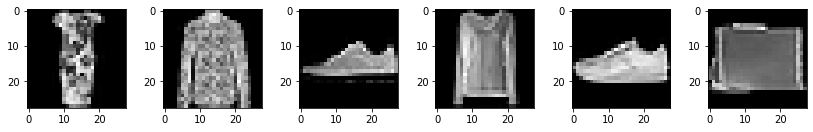

Reconstruction


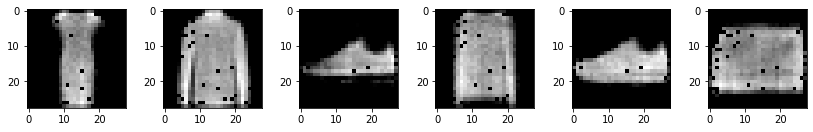

In [65]:
plt.figure(figsize = (24, 4))
print("Original")

pos = 0
for i in range(100, 106):
    
    plt.subplot(2, 10, pos+1)
    
    img = test_data[i].reshape(28, 28)
    plt.imshow(img, cmap = 'gray')
    pos = pos + 1
    
plt.show()    

plt.figure(figsize = (24, 4))
print("Reconstruction")

pos = 0
for i in range(100, 106):
    
    plt.subplot(2, 10, pos+1)

    img = pred[i].reshape(28, 28)
    plt.imshow(img, cmap ='gray')  
    pos = pos + 1
    
plt.show()